## DATA SET:  Pima-Indian-Diabetes Dataset. 

### Author: Kranti Sambhaji Walke

Data Set Information:

    Several constraints were placed on the selection of these instances from a larger database.
    In particular, all patients here are females at least 21 years old of Pima Indian heritage. 
    ADAP is an adaptive learning routine that generates and executes digital analogy of perceptron-like devices.
    It is a unique algorithm; see the paper for details. 

Attribute Information: 
    
    1.Number of times pregnant 
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
    3. Diastolic blood pressure (mm Hg) 
    4. Triceps skin fold thickness (mm) 
    5. 2-Hour serum insulin (mu U/ml) 
    6. Body mass index (weight in kg/(height in m)^2) 
    7. Diabetes pedigree function 
    8. Age (years) 
    9. Class variable (0 or 1) 

### 1. Load the dataset.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
my_data=pd.read_csv("diabetes.csv")

### 2.Summarizing and organizing a dataset

In [3]:
# Summarizing dataset
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
my_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
my_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
my_data.shape

(768, 9)

In [7]:
my_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

1.The data set contain 768 rows and 9 columns. 

2.‘Outcome’ is the target column

3.The person is diabetic if Outcome=1

4.The Person is non diabetic if Outcome=0. 

5.Out of the 768 persons, 500 are non diabetic(labelled as 0) and 268 are diabetic(labelled as 1)

In [8]:
# Find any missing or null data points of the data set
my_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no data points missing in the data set

In [9]:
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


In [10]:
my_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#Find Mean
my_data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [14]:
#Find Median
my_data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [15]:
#Find Standard Deviation
my_data.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [16]:
#Find Mode
my_data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


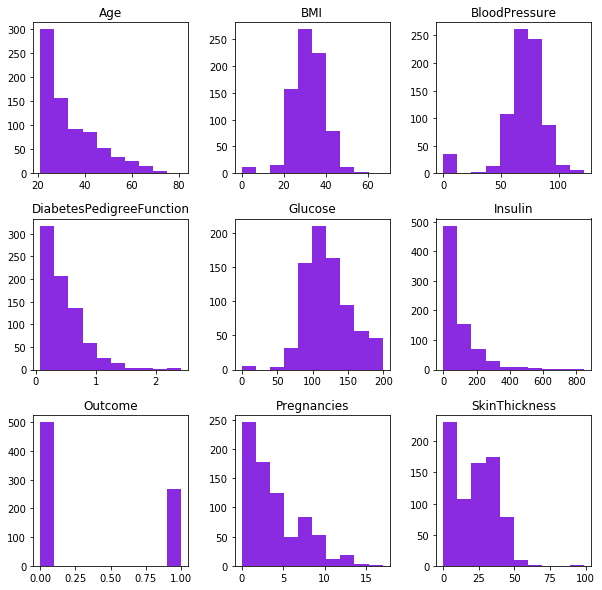

In [17]:
# Ploting histogram to check that if data columns are normal or almost normal or not

my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

### In Histogram we can see
1.The graphs of some features like BMI,BloodPressure,Glucose and SkinThickness are normally distributed or almost normally distributed.


2.Some attributes are exponentially distributed like Age,DiabetesPedigreeFunction,Pregnancies and Insulin


### 3. Data Cleaning 

In [18]:
#First Check if any inependent variables have zero values.

### In the dataset (diabetes.csv file) some people have null or zero values for some of the varibles like - Glucose(5 out off 768), BloodPressure(35 out off 768), SkinThikness(227 out of 768), Insulin(374 out of 768), BMI(11 out of 768) .

In [19]:
print("Count of zero values for-")
print("Glucose:", my_data[my_data.Glucose == 0].shape[0])
print("BloodPressure:",my_data[my_data.BloodPressure == 0].shape[0])
print("SkinThickness:", my_data[my_data.SkinThickness == 0].shape[0])
print("Insulin:", my_data[my_data.Insulin == 0].shape[0])
print("BMI:", my_data[my_data.BMI == 0].shape[0])
print("DiabetesPedigreeFunction:", my_data[my_data.DiabetesPedigreeFunction == 0].shape[0])

Count of zero values for-
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0


From my knowledge:

1.Glocose level shold not be zero.

2.BloodPressure shold not be zero as a living person don't have zero mm Hg BP.

3.SkinThinkness can not be less than 10mm.

4.A person may have 0 mm U/ml "Insulin" but  I think  it is in rare situation.

5.It's not possible to have 0 BMI .

### As it is not possible to eliminate all those rows which contains zero values (as quantity of zero values is more in dataset), but in this way we would lost a lot of important data.

#### a) So I am trying to check the impact on dataset by removing the rows in which the “Glucose”, “BloodPressure” and “BMI” values are zero.

In [20]:
my_data[(my_data.Glucose != 0) & (my_data.BloodPressure != 0) & (my_data.BMI != 0)].shape

(724, 9)

In [21]:
my_data.shape

(768, 9)

In [22]:
my_data1=my_data.drop(my_data[my_data['Glucose'] < 1].index)
my_data1.shape
my_data2=my_data1.drop(my_data1[my_data1['BloodPressure'] < 1].index)
my_data2.shape
my_data3=my_data2.drop(my_data2[my_data2['BMI'] < 1].index)
my_data3.shape #Modified dataset after datacleaning

(724, 9)

In [23]:
my_data3.mean()

Pregnancies                   3.866022
Glucose                     121.882597
BloodPressure                72.400552
SkinThickness                21.443370
Insulin                      84.494475
BMI                          32.467127
DiabetesPedigreeFunction      0.474765
Age                          33.350829
Outcome                       0.343923
dtype: float64

In [24]:
my_data3.median()

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                24.000
Insulin                      48.000
BMI                          32.400
DiabetesPedigreeFunction      0.379
Age                          29.000
Outcome                       0.000
dtype: float64

In [25]:
my_data3.std()

Pregnancies                   3.362803
Glucose                      30.750030
BloodPressure                12.379870
SkinThickness                15.732756
Insulin                     117.016513
BMI                           6.888941
DiabetesPedigreeFunction      0.332315
Age                          11.765393
Outcome                       0.475344
dtype: float64

#### Here I can see that there is not a big difference in mean,median and standard deviation  if we  eliminate some of  people's data with null/zero values (Glucose,BloodPressure and BMI).

#### b) Now I am trying to replace some values which contains zero value by the median value for a specific column

##### Here when I tried to replace values,then I noticed that there was not that much difference data for "SkinThickness" but some differences noticed for "Insulin". So I am droping option (b) and going with only option(a).

### 4.Graph Plots and Finding relationship between various elements

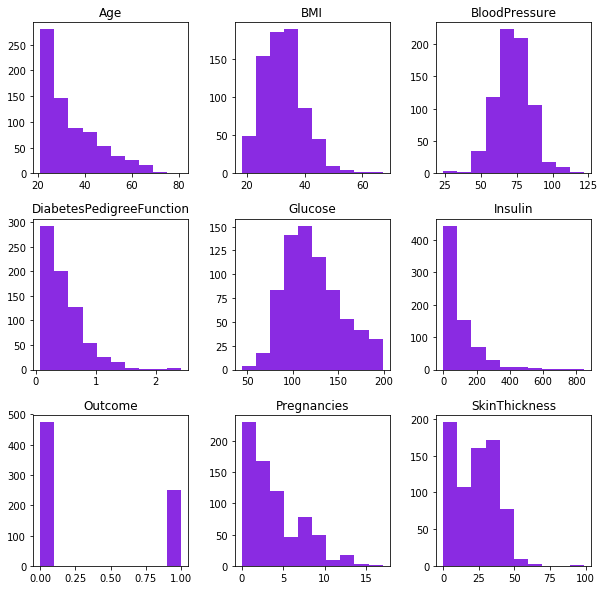

In [26]:
my_data3.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

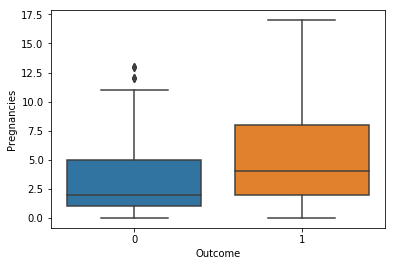

In [27]:
#boxplot
sns.boxplot(x="Outcome",y="Pregnancies", data=my_data3)

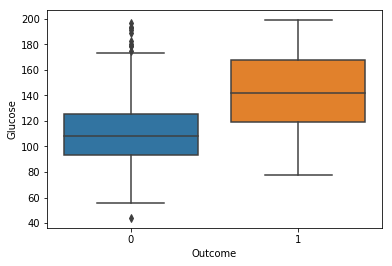

In [28]:
sns.boxplot(x="Outcome",y="Glucose", data=my_data3)

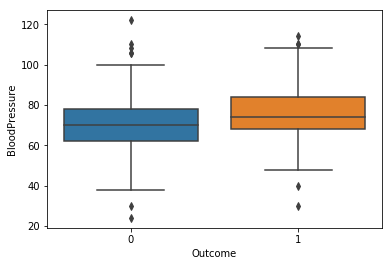

In [29]:
sns.boxplot(x="Outcome",y="BloodPressure", data=my_data3)

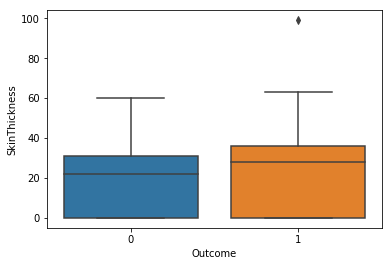

In [30]:
sns.boxplot(x="Outcome",y="SkinThickness", data=my_data3)

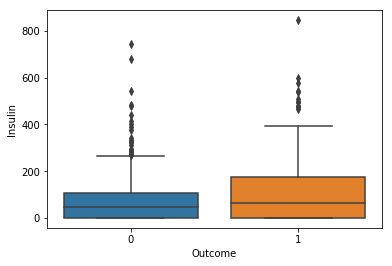

In [31]:
sns.boxplot(x="Outcome",y="Insulin", data=my_data3)

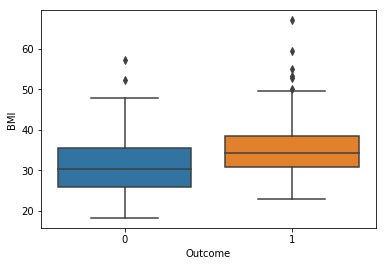

In [32]:
sns.boxplot(x="Outcome",y="BMI", data=my_data3)

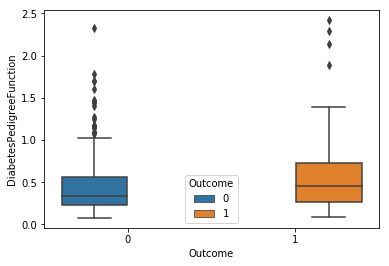

In [33]:
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction", hue="Outcome", data=my_data3)
plt.show()

Both the Outcomes show many outliers.
The outliers for nondiabetic people have low DiabetesPedigreeFunctions than those who are diabetic. 

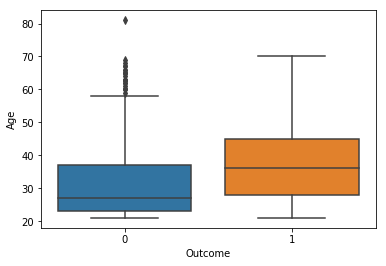

In [34]:
sns.boxplot(x="Outcome",y="Age", data=my_data3)

Here is no any particular relation between "Age" and "Outcome".Also There are some outliers present for nondiabetic persons.

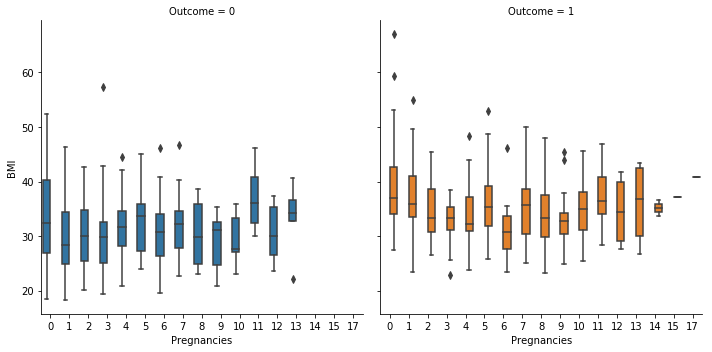

In [35]:
sns.catplot(x="Pregnancies",y="BMI", col="Outcome", hue="Outcome", data=my_data3, kind="box")
plt.show()

Here I saw those who are nondiabetic  have lower BMI.
There are more people who were pregnant 0 times than 17.
For diabetic women more outliers are present with low pregnancies and high BMI.

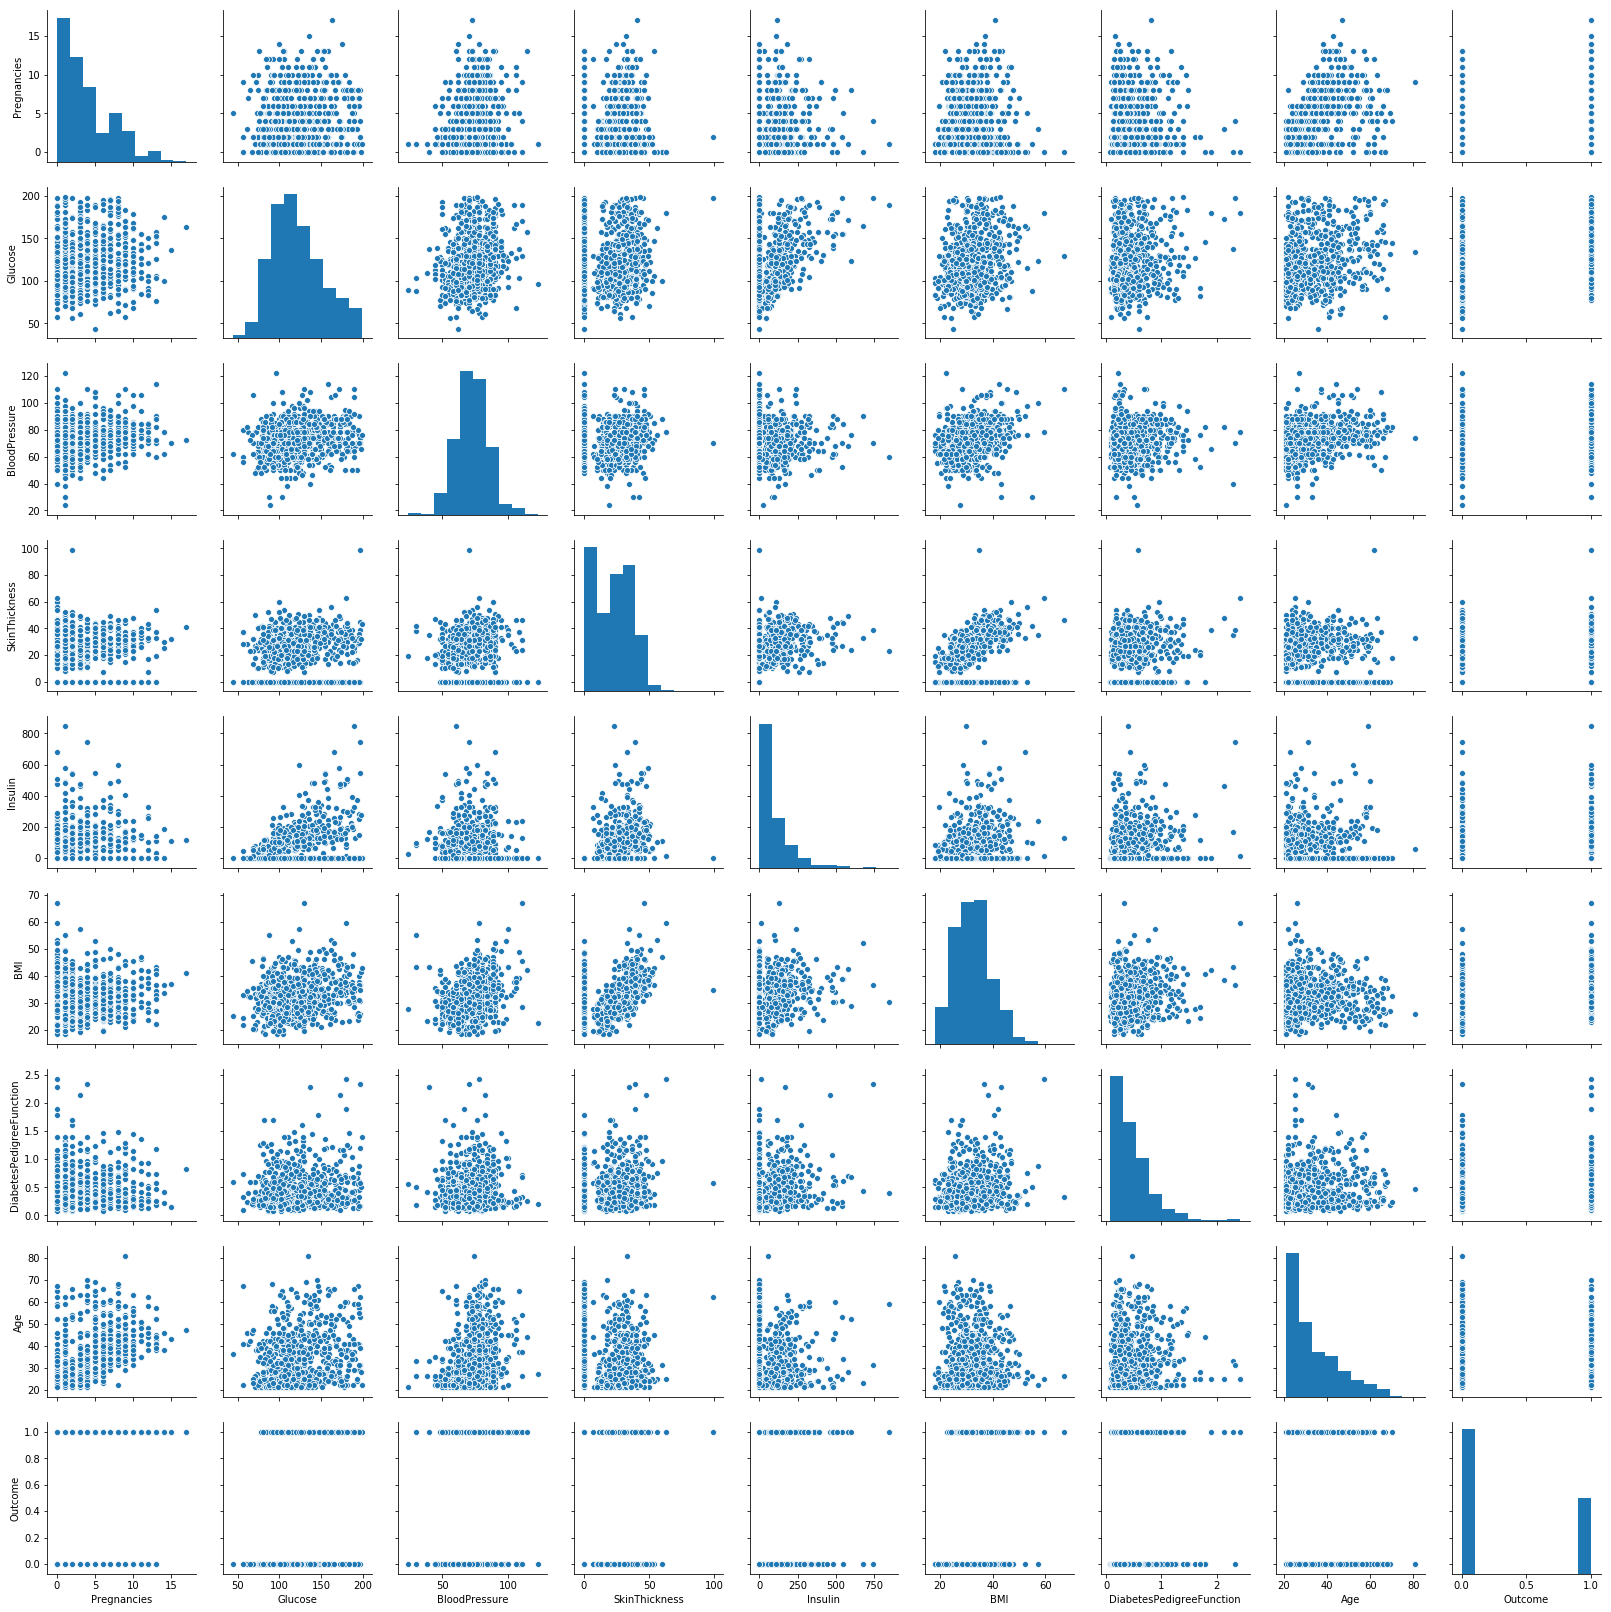

In [36]:
#Pairplot 
sns.pairplot(my_data3)
plt.show()

### In Pairplot we can see

1.There is no any relation between "Age and Outcome".

2.There is slightly linear relation between "BMI and SkinThickness"

In [37]:
# Calculate the correlation matrix 
cor=my_data3.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


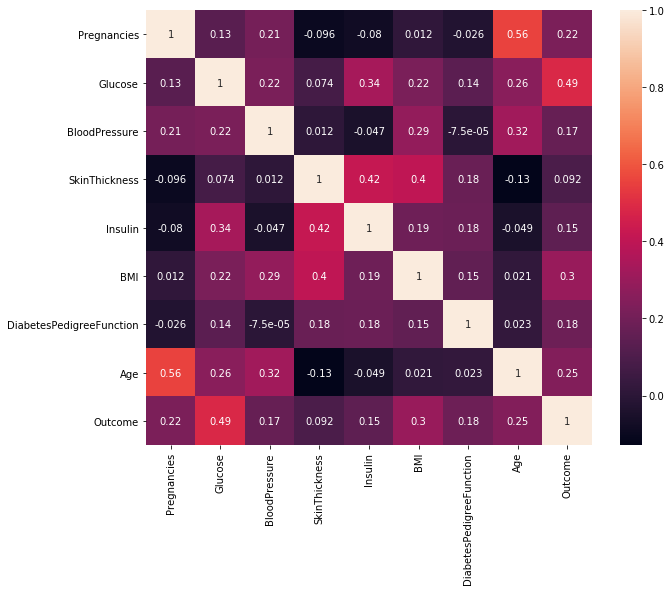

In [38]:
# heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

## 5. Conclusion 

#### 1.From above heatmap I conclude here,

1.There is some relation between No.of Pregnancies and Age.

2.There is some relation between Insulin and SkinThickness.

3.There is some relation between Insulin and Glucose.

4.There is some relation between BMI and SkinThickness.

#### 2. Overall, it seems that there is some kind of association between BMI, No.Of Pregnancies, DiabetesPedigreeFunction and the Outcome Columns. 

#### 3. I saw those who are nondiabetic have lower BMI. The people who were pregnant 0 times are more. For diabetic women more outliers are present with low pregnancies and high BMI. There is no any particular relation between "Age" and "Outcome".